In [106]:
import os
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [3]:
data_directory = './ecephys_cache' # must be updated to a valid directory in your filesystem

manifest_path = os.path.join(data_directory, "manifest.json")

In [4]:
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [5]:
sessions = cache.get_session_table()

print('Total number of sessions: ' + str(len(sessions)))


sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


In [6]:
filtered_sessions = sessions[(sessions.full_genotype.str.find('Sst') > -1) & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['VISp' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

print(len(filtered_sessions))
filtered_sessions.head()

6


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
756029989,2019-10-03T00:00:00Z,734865738,brain_observatory_1.1,96.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,684,2214,6,"[TH, DG, CA3, CA1, VISl, nan, PO, Eth, LP, VIS..."
758798717,2019-10-03T00:00:00Z,735109609,brain_observatory_1.1,102.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,593,1486,4,"[MGv, MGd, TH, DG, CA1, VISal, nan, SGN, LP, S..."
760693773,2019-10-03T00:00:00Z,738651054,brain_observatory_1.1,110.0,F,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,826,2233,6,"[grey, VISrl, nan, VISal, VISp, VISpm, VISam]"


In [10]:
session_id = 715093703  # based on the above filter
session = cache.get_session_data(session_id)

In [230]:
units = cache.get_units?
units

,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cumulative_drift,d_prime,waveform_duration,ecephys_channel_id,firing_rate,waveform_halfwidth,isi_violations,...,phase,sampling_rate,has_lfp_data,date_of_acquisition,published_at,specimen_id,session_type,age_in_days,sex,genotype
id,,,,,,,,,,,,,,,,,,,,,
915956282,0.611816,164.878740,0.072728,309.71,3.910873,0.535678,850229419,6.519432,0.164824,0.104910,...,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt
915956340,0.439372,247.254345,0.000881,160.24,5.519024,0.563149,850229419,9.660554,0.206030,0.006825,...,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt
915956345,0.500520,251.275830,0.001703,129.36,3.559911,0.521943,850229419,12.698430,0.192295,0.044936,...,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt
915956349,0.424620,177.115380,0.096378,169.29,2.973959,0.508208,850229419,16.192413,0.192295,0.120715,...,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt
915956356,0.512847,214.954545,0.054706,263.01,2.936851,0.549414,850229419,2.193113,0.233501,0.430427,...,3a,29999.915391,True,2019-01-09T00:26:20Z,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951911942,0.368040,189.249060,0.001083,122.82,5.362617,0.631826,850103120,0.984659,0.192295,0.080230,...,3a,29999.958001,True,2018-10-31T17:39:23Z,2019-10-03T00:00:00Z,735109609,brain_observatory_1.1,102.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
951911948,0.660350,80.706600,0.000416,108.17,3.507884,0.302178,850103122,10.327972,0.233501,0.000365,...,3a,29999.958001,True,2018-10-31T17:39:23Z,2019-10-03T00:00:00Z,735109609,brain_observatory_1.1,102.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
951911955,0.357672,117.232440,0.023316,336.04,2.790057,0.714238,850103126,1.782535,0.192295,0.318256,...,3a,29999.958001,True,2018-10-31T17:39:23Z,2019-10-03T00:00:00Z,735109609,brain_observatory_1.1,102.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt


# Natural Movie One

In [354]:
stim_epochs = session.get_stimulus_epochs()
stim_epochs = stim_epochs[stim_epochs.stimulus_name=="natural_movie_one"]
stim_pres_ids = session.get_stimulus_table(['natural_movie_one']).index
stim_epochs

,start_time,stop_time,duration,stimulus_name,stimulus_block
9,2835.861733,3136.112583,300.25085,natural_movie_one,4
25,7693.936523,7994.187283,300.25076,natural_movie_one,12


natual movie 1 is 30 seconds per clip repeated 10 times per block, natural movie 2 is 120 second per clip repeated 5 times per block.

In [355]:
unit_ids = units[(units.ecephys_structure_acronym=="VISp") & (units.specimen_id==filtered_sessions.specimen_id[session_id])].index
unit_ids.shape

(60,)

In [356]:
session.presentationwise_spike_counts?

In [357]:
times = session.presentationwise_spike_times(stimulus_presentation_ids=stim_pres_ids, # is this right? todo
                                             unit_ids=unit_ids)

In [257]:
times

,stimulus_presentation_id,unit_id,time_since_stimulus_presentation_onset
spike_time,,,
2835.864302,22000,950930985,0.002569
2835.872035,22000,950930407,0.010302
2835.872502,22000,950930964,0.010769
2835.880435,22000,950931517,0.018702
2835.881935,22000,950931254,0.020202
...,...,...,...
7994.181869,66115,950932563,0.027946
7994.183102,66115,950933732,0.029180
7994.183636,66115,950932102,0.029713


In [358]:
num_bins = 200
stim_length = 30  # seconds for natural movie one
stim_range = np.array([0, stim_length])
trials = np.zeros((20, num_bins, len(unit_ids)))  # stimulus was presented 20 times
bin_edges = np.linspace(0, stim_length, num_bins + 1)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
bin_width = bin_edges[1] - bin_edges[0]

for j, unit_id in enumerate(unit_ids):
    # 1st block where nat 1 is shown, it is shown 10 times in each block
    presentations1 = stim_epochs.iloc[0].start_time + np.linspace(0, stim_epochs.iloc[0].duration, 10)
    # 2nd block
    presentations2 = stim_epochs.iloc[1].start_time + np.linspace(0, stim_epochs.iloc[1].duration, 10)
    presentations = np.concatenate([presentations1, presentations2])
    for i, start in enumerate(presentations):
        times_ij = times[(times.unit_id==unit_id) & (start < times.index) & (times.index < (start + stim_length))].index
        unit_counts, _ = np.histogram(times_ij, num_bins, range=start + stim_range)
        trials[i, :, j] = unit_counts

In [359]:
trials

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 1., ..., 1., 0., 0.],
        [7., 0., 2., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [2., 0., 1., ..., 0., 0., 0.]],

       [[4., 0., 0., ..., 0., 0., 0.],
        [2., 0., 2., ..., 0., 0., 0.],
        [4., 0., 2., ..., 1., 0., 0.],
        ...,
        [6., 0., 0., ..., 1., 1., 1.],
        [1., 0., 0., ..., 6., 0., 0.],
        [1., 0., 0., ..., 5., 0., 0.]],

       [[5., 0., 0., ..., 0., 0., 0.],
        [7., 0., 1., ..., 0., 1., 0.],
        [2., 0., 3., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 2., ..., 0., 0., 0.]],

       ...,

       [[2., 3., 0., ..., 0., 0., 0.],
        [3., 2., 0., ..., 0., 0., 0.],
        [2., 1., 1., ..., 0., 0., 0.],
        ...,
        [1., 2., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        [1., 4., 0., ..., 0., 0.

In [360]:
trials.shape

(20, 200, 60)

In [361]:
avgCounts = np.mean(trials, axis=0)
avgCounts

array([[1.85, 1.5 , 0.6 , ..., 0.2 , 0.  , 0.1 ],
       [2.65, 1.75, 0.7 , ..., 0.3 , 0.1 , 0.  ],
       [2.05, 1.45, 0.95, ..., 0.25, 0.  , 0.  ],
       ...,
       [1.75, 1.4 , 0.2 , ..., 0.15, 0.4 , 0.05],
       [0.8 , 0.8 , 0.25, ..., 0.45, 0.15, 0.  ],
       [1.65, 1.15, 0.35, ..., 0.3 , 0.15, 0.05]])

<BarContainer object of 200 artists>

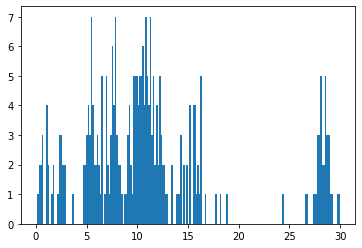

In [362]:
%matplotlib inline
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
bin_width = bin_edges[1] - bin_edges[0]
plt.bar(bin_centers, trials[0, :, 2], width=bin_width)

- plot a 3d representation of units' (average?) responses
- singular value spectrum
- project the average response for the first 30 seconds of natural movie 3 onto the PCs for nat mov 1. calculate explained variance
- compare responses between trials
- mutual information (define response as a specific classification)
- use the 4 different videos (nat 1, nat 3 (1), nat 3 (2), nat 3 (3)) and try to cluster the responses in PCA space

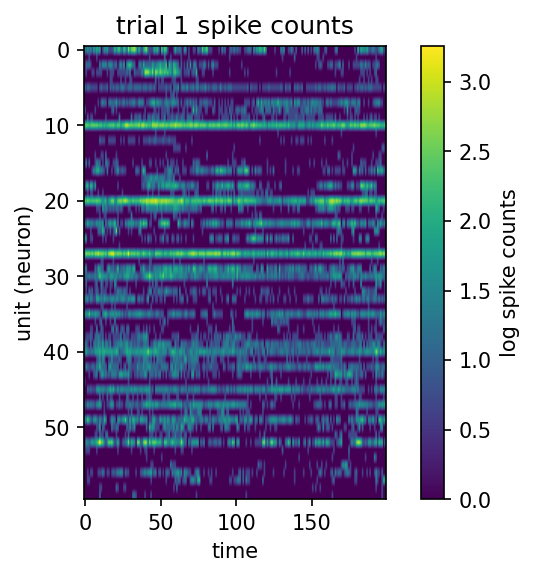

In [363]:
plt.figure(dpi=150)
plt.ylabel("unit (neuron)")
plt.xlabel("time")
plt.imshow(np.log(trials[1].T + 1), aspect=5)
plt.title("trial 1 spike counts")
plt.colorbar(label="log spike counts")

In [364]:
X = avgCounts
print(X.shape)
Xc = X - np.mean(X, axis=0, keepdims=True)

(200, 60)


In [365]:
cov = np.transpose(Xc) @ Xc / Xc.shape[0]
cov.shape

(60, 60)

In [366]:
U, S, Vh = np.linalg.svd(Xc)

In [367]:
Y = np.transpose(Vh @ np.transpose(Xc))

In [368]:
covY = np.transpose(Y) @ Y / Y.shape[0]
varY = S**2 / Y.shape[0]

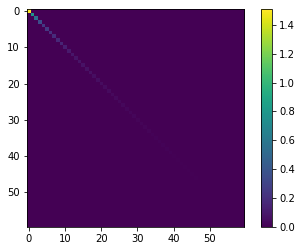

In [369]:
plt.figure()
plt.imshow(covY)
plt.colorbar()
plt.show()

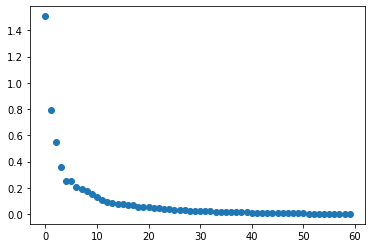

In [370]:
plt.figure()
plt.scatter(np.arange(len(S)), varY)

In [371]:
d = sum(S**2) / sum(S)**2
print(d, d * len(S))

0.03225074478369603 1.9350446870217617


<BarContainer object of 200 artists>

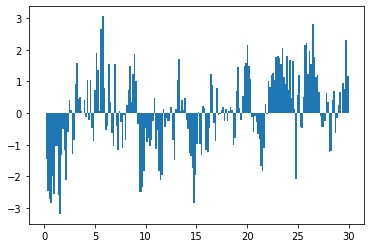

In [372]:
plt.figure()
plt.bar(bin_centers, Y[:, 0], width=bin_width)  # principle response

In [346]:
# # by the nature of the SVD, the first 3 rows of \Sigma V^T tell you how the images are projected onto the princple component
# proj_responses = np.diag(S[:3]) @ Vh[:3]
# print(proj_responses.shape)


# %matplotlib notebook
# fig = plt.figure(dpi=120)
# ax = fig.gca(projection='3d')
# plt.title("neurons' responses projected onto PCA space")
# ax.scatter(proj_responses[0, :], proj_responses[1, :], proj_responses[2, :])
# ax.view_init(elev=15, azim=50)
# plt.xlabel("1st principle comp.")
# plt.ylabel("2nd principle comp.")
# ax.set_zlabel("3rd principle comp.")
# plt.show()

# Static Grating Classification

In [352]:
stim_epochs = session.get_stimulus_epochs()
stim_epochs = stim_epochs[stim_epochs.stimulus_name=="static_gratings"]
stim_epochs

,start_time,stop_time,duration,stimulus_name,stimulus_block
17,5381.988653,5862.389913,480.40126,static_gratings,8
23,7183.510123,7663.911423,480.40130,static_gratings,11
29,8594.688933,9135.140323,540.45139,static_gratings,14


In [381]:
stims = session.get_stimulus_table(['static_gratings'])
stims

,contrast,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,
49432,0.8,120,0.5,"[250.0, 250.0]",0.32,5381.988653,8,static_gratings,5382.238857,0.250204,4787
49433,0.8,150,0.5,"[250.0, 250.0]",0.08,5382.238857,8,static_gratings,5382.489060,0.250204,4788
49434,0.8,60,0.5,"[250.0, 250.0]",0.32,5382.489060,8,static_gratings,5382.739264,0.250204,4789
49435,0.8,120,0.75,"[250.0, 250.0]",0.04,5382.739264,8,static_gratings,5382.989467,0.250204,4790
49436,0.8,150,0.0,"[250.0, 250.0]",0.02,5382.989467,8,static_gratings,5383.239686,0.250219,4791
...,...,...,...,...,...,...,...,...,...,...,...
70383,0.8,60,0.75,"[250.0, 250.0]",0.04,9133.889309,14,static_gratings,9134.139517,0.250209,4886
70384,0.8,90,0.0,"[250.0, 250.0]",0.02,9134.139517,14,static_gratings,9134.389719,0.250201,4806
70385,0.8,60,0.0,"[250.0, 250.0]",0.08,9134.389719,14,static_gratings,9134.639920,0.250201,4874


In [396]:
filtered_stims = stims[(stims.phase=="0.0") & (stims.spatial_frequency=="0.04")]
filtered_stims

,contrast,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,
49437,0.8,60,0.0,"[250.0, 250.0]",0.04,5383.239686,8,static_gratings,5383.489905,0.250219,4792
49443,0.8,30,0.0,"[250.0, 250.0]",0.04,5384.740946,8,static_gratings,5384.991147,0.250201,4798
49448,0.8,90,0.0,"[250.0, 250.0]",0.04,5385.991973,8,static_gratings,5386.242184,0.250211,4803
49456,0.8,30,0.0,"[250.0, 250.0]",0.04,5387.993653,8,static_gratings,5388.243862,0.250209,4798
49460,0.8,30,0.0,"[250.0, 250.0]",0.04,5388.994487,8,static_gratings,5389.244699,0.250211,4798
...,...,...,...,...,...,...,...,...,...,...,...
70301,0.8,150,0.0,"[250.0, 250.0]",0.04,9113.372172,14,static_gratings,9113.622370,0.250199,4838
70314,0.8,150,0.0,"[250.0, 250.0]",0.04,9116.624855,14,static_gratings,9116.875054,0.250199,4838
70361,0.8,150,0.0,"[250.0, 250.0]",0.04,9128.384686,14,static_gratings,9128.634885,0.250199,4838


In [397]:
filtered_stims.shape

(294, 11)

In [404]:
num_bins = 10
stim_duration = filtered_stims.duration.min()  # minimum so that none of the recording periods are overlapping
bin_edges = np.linspace(0, stim_duration, num_bins + 1)
counts = session.presentationwise_spike_counts(bin_edges=bin_edges,
                                               stimulus_presentation_ids=filtered_stims.index,
                                               unit_ids=unit_ids)

In [470]:
oris = np.unique(filtered_stims.orientation).astype(int)
oris

array([  0,  30,  60,  90, 120, 150])

## Classification

In [464]:
from sklearn import svm
from sklearn import metrics

In [459]:
X = np.reshape(np.array(counts), (294, num_bins * len(unit_ids)))
labels = np.array(list(filtered_stims.orientation))

# train test split
train_frac = 0.7
train_idxs = np.array([], dtype=int)
test_idxs = np.array([], dtype=int)
for label in np.unique(labels):
    matches = np.nonzero(labels == label)[0]
    np.random.shuffle(matches)
    train_idxs = np.concatenate([train_idxs, matches[:int(train_frac * len(matches))]])
    test_idxs = np.concatenate([test_idxs, matches[int(train_frac * len(matches)):]])

In [461]:
clf = svm.SVC()
clf.fit(X[train_idxs], labels[train_idxs])

SVC()

In [462]:
fit = clf.predict(X[train_idxs])
train_err = np.sum(fit != labels[train_idxs]) / len(fit)
train_err

0.12254901960784313

In [463]:
pre = clf.predict(X[test_idxs])
err = np.sum(pre != labels[test_idxs]) / len(pre)
err

0.36666666666666664

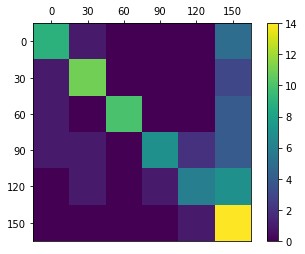

In [492]:
conf = metrics.confusion_matrix(labels[test_idxs], pre, labels=oris)
plt.imshow(conf)
ax = plt.gca()
ax.xaxis.tick_top()
ax.set_xticks(np.arange(6))
ax.set_yticks(np.arange(6))
ax.set_xticklabels(oris)
ax.set_yticklabels(oris)
plt.colorbar()

In [489]:
ax.set_xticklabels?